---
# Zadaća 7
##### Rok za predaju: 5. svibnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Petar Kelava

---

## Zadatak 1

Zadana vam je neuronska mreža (slika ispod). Aktivacijska funkcija $g(.)$ u skrivenom sloju je sigmoid funkcija. Pokažite da postoji ekvivalentna neuronska mreža koja u skrivenom sloju umjesto sigmoid aktivacijske funkcije ima $tanh$ aktivacijsku funkciju. Raspišite to. 



<img src="./zadatak1.png" width="50%">
<center>Slika 2. model neuronske mreže</center>


Pomoć (pratite sljedeće korake) : 
- Raspišite kako izgleda aktivacija $a_1^{(3)}$ prateći oznake uvedene gore
- Pronađite povezanost između funkcije sigmoid i $tanh$ (raspišite)
- Kada dvije gornje informacije spojite, imate sljedeće - ako je $y_T = a_1^{(3)}$ rezultat dobiven neuronskom mrežom u kojoj ste koristili $tanh$ funkciju, a $y_S = a_1^{(3)}$ rezultat dobiven neuronskom mrežom u kojoj ste koristili sigmoid, tada možete pronaći vezu između ta dva rezultata tako da parametre jedne mreže zapišete kao linearnu kombinaciju parametara druge mreže. <br>

$$ tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} = \frac{e^{x}+e^{-x}}{e^{x}+e^{-x}} - \frac{2e^{-x}}{e^{x}+e^{-x}} = 1 - \frac{2}{e^{2x}+1} = 1 - \frac{2}{1+e^{2x}}$$ 
$$\sigma(x) = \frac{1}{1+e^{-x}} = \frac{1}{\frac{e^{x} + 1}{e^{x}}} = 1 - \frac{1}{1+e^{x}}$$
$$ tanh(x/2) = 2\sigma(x) - 1 $$ <br />
$$ \frac{tanh(x/2) + 1}{2} = \sigma(x) $$

Dvije neuronske mreže su ekvivaletne ako za iste ulaze imaju iste izlaze.

Neka je N = (X, theta, activation(x), F), naša dana neuronska mreža, gdje je: <br />
activation(x) = sigmoid(x)   
X-ulazni skup <br /> 
theta-matrica parametara <br /> 
activation(x) - aktivacijska funkcija <br /> 
F-izlaz <br /> <br />

Konstruirajmo N'=(X, theta', activation'(x), F) neuronsku mrežu koja će biti ekvivaletna N a za aktivacijsku funkciju će koristiti tanh(x): <br />
activation'(x) =  $ \frac{tanh(x/2) + 1}{2} $ <br />
X - ulazni skup ostaje isti <br /> 
theta' = theta - matrica parametara ostaje ista <br /> 
activation'(x) - aktivacijska funkcija se mijenja u $ \frac{tanh(x/2) + 1}{2} $ <br /> 
F-izlaz ostaje isti <br /> <br />





---
## Zadatak 2
Modelirajte logčki 'XOR'. Nacrtajte neuronsku mrežu i zapišite parametre $\theta$ s kojima bi dobro modelirali ponašanje operatora.

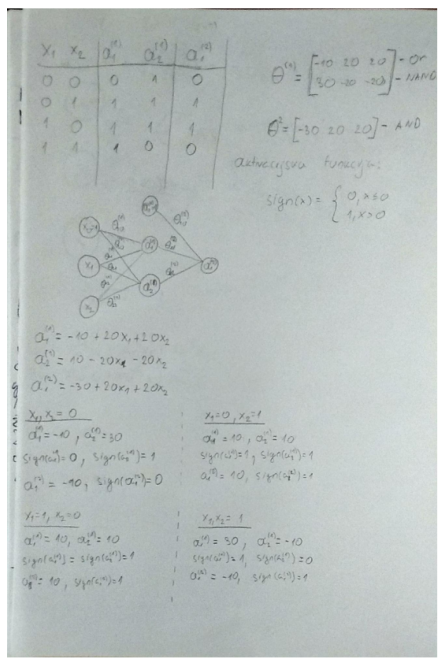

In [220]:
from PIL import Image
datapath = 'Zadatak2.PNG'
im = Image.open(datapath)
X = np.asarray(im,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(X)
plt.axis('off')
plt.show()

---
## Zadatak 3

Neka je zadana kriterijska funkcija $$J(\theta) = - \sum\limits_{i=1}^{m} [y^{(i)}\log{h_{\theta}(x^{(i)}) + (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)})})}],$$ gdje je za svaki $i$, $y^{(i)}$ stvarna vrijednost podatka, a $h_{\theta}(x^{(i)})$ predikcija. <br> Ako su neuroni u završnom sloju označeni sa $a_k$, pokažite da je derivacije te funkcije s obzirom na $a_k$, sa sigmoid aktivacijskom funkcijom zadovoljava $\frac{\partial J}{\partial a_k} = h_{\theta}(x^{(k)}) - y^{(k)}$. <br> (Uzmite kriterijsku funkciju za jedan podatak $i$). 

$$ h_{\theta}'(x^{(i)})= (\frac{1}{1+e^{-x}})' = - \frac{e^{-x}}{(1+e^{-x})^{2}} $$
$$ h_{\theta}(x^{(i)})(1 - h_{\theta}(x^{(i)}))= \frac{1}{1+e^{-x}} \frac{1+e^{-x}-1}{1+e^{-x}} = \frac{e^{-x}}{(1+e^{-x})^{2}}$$
$$ h_{\theta}'(x^{(i)})=-h_{\theta}(x^{(i)})(1 - h_{\theta}(x^{(i)})) (*)$$ 
$$ x^{(k)} := a_{k} $$
$$\frac{\partial J}{\partial x^{(k)}} = \frac{\partial(y^{(k)}logh_{\theta}(x^{(k)})+(1-y^{(k)})log(1-h_{\theta}(x^{(k)})))}{\partial x^{(k)}} = y^{(k)}\frac{1}{h_{\theta}(x^{(k)})}h_{\theta}'(x^{(k)}) + (1-y^{(k)})\frac{1}{1 - h_{\theta}(x^{k})}(-h_{\theta}'(x^{(k)})) = $$
$$= h_{\theta}'(x^{(k)})(\frac{y^{(k)}}{h_{\theta}(x^{(k)})} - \frac{1 - y^{(k)}}{1 - h_{\theta}'(x^{(k)})}) =  h_{\theta}'(x^{(k)})\frac{y^{(k)} - y^{(k)}h_{\theta}(x^{(k)}) - h_{\theta}(x^{(k)}) + y^{(k)}h_{\theta}(x^{(k)})}{h_{\theta}(x^{(k)})(1-h_{\theta}(x^{(k)}))} =iz (*) imamo = -(-h_{\theta}(x^{(k)}) + y^{k}) = h_{\theta}(x^{(k)}) - y^{k}$$

---
## Zadatak 4 
Zadani su vam regresijski podaci `X,y`.  Proučite dimenzije podataka i odredite arhitekturu mreže i skicirajte ju (priložite sliku). Proizvoljno odredite aktivacijske funkcije i funkciju pogreške. Zatim napravite vektore težina odgovarajuće dimenzije (generirajte slučajne vektore) i napravite propagaciju unaprijed.  

Napomena: Propagaciju unaprijed napravite ručno, koristeći `numpy`

In [207]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,mean_squared_error
import time

In [208]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [209]:
# ne mijenjajte sljedeci redak
X,y = make_regression(n_samples = 300, n_features = 6, random_state=102)

In [210]:
X.shape, y.shape

((300, 6), (300,))

In [218]:
#Svaki layer je veličine (veličina_prošlog + veličina_zadnjeg)/2 zakoruženo prema gore
inputSize = 6
hid1 = 4
hid2 = 3
hid3 = 2
outputSize = 1

In [212]:
w1 = np.random.randn(inputSize, hid1)
w2 = np.random.randn(hid1, hid2)
w3 = np.random.randn(hid2, hid3)
w4 = np.random.randn(hid3, outputSize)

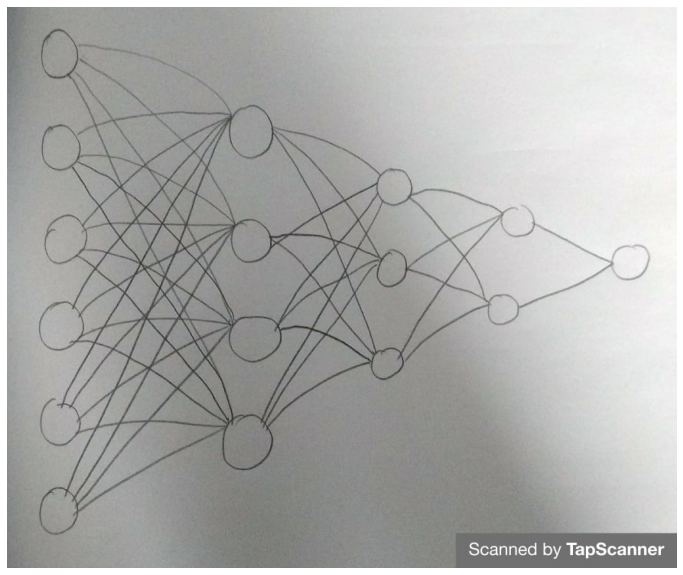

In [221]:
datapath = 'Zadatak4.jpg'
im = Image.open(datapath)
X = np.asarray(im,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(X)
plt.axis('off')
plt.show()

In [215]:
print("Ulazni podaci",X.shape)
print("Težine w1", w1.shape)
print("Težine w2", w2.shape)
print("Težine w3", w3.shape)
print("Težine w4", w4.shape)      

Ulazni podaci (300, 6)
Težine w1 (6, 4)
Težine w2 (4, 3)
Težine w3 (3, 2)
Težine w4 (2, 1)


In [217]:
a2 = X.dot(w1) 
z2 = sigmoid(a2)

a3 = z2.dot(w2) 
z3 = sigmoid(a3) 

a4 = z3.dot(w3) 
z4 = sigmoid(a4)

y_pred = z4.dot(w4) 

mean_squared_error(y_pred, y)

21433.92155847794

---

## Zadatak 5

Ovaj skup skup sadrži $8124$ uzoraka gljiva i njihove $23$ karakteristike. Svakoj gljivi je pridružena klasa $e$ kao *jestiva*(*engl.* edible), $p$ kao *otvorna*(*engl. poisonous*) ili $u$ kao *nepoznato*(*unknown*). <br>
Ostale varijable su kategoričke i tipa su *boolean* ili *string*. Uglavnom su stringovi opisni. Npr. značajka $cap-shape$ može poprimiti vrijednosti 
- bell=b
- conical=c
- convex=x
- flat=f
- knobbed=k
- sunken=s

- Potrebno je upoznati se sa skupom podataka te značajke koje nisu numeričke pretvoriti u numeričke kako bismo s njima mogli dalje računati. 
- Podijelite skup podataka na skup za treniranje i testiranje.
- Odredite dimenzije podataka (odredite dimenzije ulaznog i izlaznog sloja neuronske mreže).
- Proizvoljno odaberite arhitekturu skrivenih slojeva.
- Implementirajte vašu neuronsku mrežu.
- Provedite postupak učenja neuronske mreže.
- Testirajte dobiveni model tako da ispišete neku od metrika (npr. `accuracy`).

Napomena: Model napravite i trenirajte koristeći `PyTorch`

In [152]:
import torch

In [153]:
#Jer su cuda-corevi samo na nvidinim grafičkim karticama, a ja imam amd-ovu moj torch ce raditi na CPU-u
device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    print("Running on the CPU")

Running on the CPU


In [154]:
def ToInt(X):
    Xnew = X.copy()
    for i in range(X.shape[0]):
        Xnew[i] = np.array([[int(ele) if ele.isdigit() else (ord(ele)%97) for ele in X[i]]])
    return Xnew

In [165]:
A = pd.read_csv('mushrooms.csv', header=None)
X = (A.to_numpy())[1:8124]
Xnew = ToInt(X)
y = Xnew[:,0]
y = np.array([0 if k == 4 else 1 for k in y])
Xnew = Xnew[:,1:23]
x_train, x_test, y_train, y_test = train_test_split(Xnew, y, test_size = 0.3)
print('U trening skupu podataka imamo', x_train.shape[0], ', a u testnom ', x_test.shape[0])

U trening skupu podataka imamo 5686 , a u testnom  2437


(8123,)

In [166]:
x_train = np.array(x_train.tolist())
x_test = np.array(x_test.tolist())
y_train = np.array(y_train.tolist())
y_test = np.array(y_test.tolist())
x_train = torch.tensor(x_train,dtype=torch.float)
x_test = torch.tensor(x_test,dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

tensor([[23., 24.,  6.,  ..., 13., 21.,  3.],
        [ 5., 18.,  4.,  ..., 22., 21., 11.],
        [ 5., 24.,  6.,  ...,  7., 21.,  6.],
        ...,
        [23., 24., 13.,  ..., 10., 24.,  3.],
        [23., 18.,  6.,  ...,  7., 18., 20.],
        [ 5., 24., 13.,  ..., 22., 21., 11.]])

In [157]:
print('Podaci imaju', x_train.shape[1], ' featurea. ')

Podaci imaju 22  featurea. 


In [167]:
# parametri
inp = 22
hid1 = 12
hid2 = 7
hid3 = 5
out = 2

In [176]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid1),
                            torch.nn.PReLU(),
                            torch.nn.Linear(hid1, hid2),
                            torch.nn.PReLU(),
                            torch.nn.Linear(hid2, hd3),
                            torch.nn.PReLU(),
                            torch.nn.Linear(hd3, out),
                            torch.nn.Sigmoid()
                           )
loss_fn = torch.nn.CrossEntropyLoss()

In [177]:
y_pred = model(x_train)
print('Dimenzija predikcije: ', y_pred.shape)
print('Predikcije za prvi podatak', y_pred[0])
print("Suma je = ", torch.sum(y_pred[0]).item())

Dimenzija predikcije:  torch.Size([5686, 2])
Predikcije za prvi podatak tensor([0.4919, 0.4248], grad_fn=<SelectBackward>)
Suma je =  0.9166878461837769


In [178]:
def run():
    learningRate = 1e-2

    time_start = time.time()
    print('--------- Starting with {} ---------')
    for iter in range(1,2000):
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)

        if iter % 100 == 0: 
            print(iter, loss.item())

        model.zero_grad()
        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learningRate*param.grad
    time_end = time.time()
    print('Required time: ',  time_end - time_start)
    
run()

--------- Starting with {} ---------
100 0.6667637825012207
200 0.6176355481147766
300 0.5595492720603943
400 0.5016481876373291
500 0.44481468200683594
600 0.41059279441833496
700 0.39303475618362427
800 0.3823353350162506
900 0.37529832124710083
1000 0.37044450640678406
1100 0.36693841218948364
1200 0.364309161901474
1300 0.36227020621299744
1400 0.36063048243522644
1500 0.359274685382843
1600 0.35811883211135864
1700 0.35709863901138306
1800 0.356181263923645
1900 0.3553534746170044
Required time:  6.644042491912842


In [179]:
test_prediction = model(x_test)
test_prediction = torch.max(test_prediction, axis=1).indices
print(accuracy_score(y_test, test_prediction.detach().numpy()))

0.95814526056627
